In [17]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta
# from math import radians, cos, sin, sqrt, atan2

# # Load the cleaned data
# file_path = '../data/Cleaned_ISC_Data.csv'
# cleaned_data = pd.read_csv(file_path)

# # Ensure uniform column names
# uniform_columns = {
#     'LAT': 'latitude',
#     'LON': 'longitude',
#     'DEPTH': 'depth',
#     'MAG': 'magnitude',
#     'DATE': 'date'
# }
# cleaned_data.rename(columns=uniform_columns, inplace=True)

# # Convert date to datetime
# cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%d-%m-%Y')

# # Haversine formula to calculate distance between two points on the Earth's surface
# def haversine(lon1, lat1, lon2, lat2):
#     R = 6371.0  # Radius of the Earth in kilometers
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     distance = R * c
#     return distance

# # Function to apply Reasenberg declustering
# def reasenberg_declustering(data, d_time=3, d_space=50):
#     declustered_indices = []
#     n = len(data)
#     for i in range(n):
#         is_mainshock = True
#         for j in range(i + 1, n):
#             t_diff = (data.iloc[j]['date'] - data.iloc[i]['date']).days
#             if t_diff > d_time:
#                 break
#             distance = haversine(data.iloc[i]['longitude'], data.iloc[i]['latitude'], data.iloc[j]['longitude'], data.iloc[j]['latitude'])
#             if distance < d_space:
#                 is_mainshock = False
#                 break
#         if is_mainshock:
#             declustered_indices.append(i)
#     return data.iloc[declustered_indices]

# # Apply the Reasenberg declustering algorithm
# declustered_data = reasenberg_declustering(cleaned_data)

# # Save the declustered DataFrame to a new CSV file
# output_file_path = '../data/mainshocks_Reasenberg.csv'
# declustered_data.to_csv(output_file_path, index=False)

# print(f"Declustered data saved to {output_file_path}")

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
cleaned_file_path = '../data/Cleaned_ISC_Data.csv'
declustered_file_path = '../data/mainshocks_Reasenberg.csv'

cleaned_data = pd.read_csv(cleaned_file_path)
declustered_data = pd.read_csv(declustered_file_path)
declustered_data.columns

Index(['EVENTID', 'TYPE', 'AUTHOR', 'date', 'TIME', 'latitude', 'longitude',
       'depth', 'DEPFIX', 'AUTHOR.1',
       ...
       'Extra_101', 'Extra_102', 'Extra_103', 'Extra_104', 'Extra_105',
       'Extra_106', 'Extra_107', 'Extra_108', 'Extra_109', 'Extra_110'],
      dtype='object', length=123)

In [19]:
print(len(cleaned_data))
print(len(declustered_data))

8040
6703


/Users/zuhair/anaconda3/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


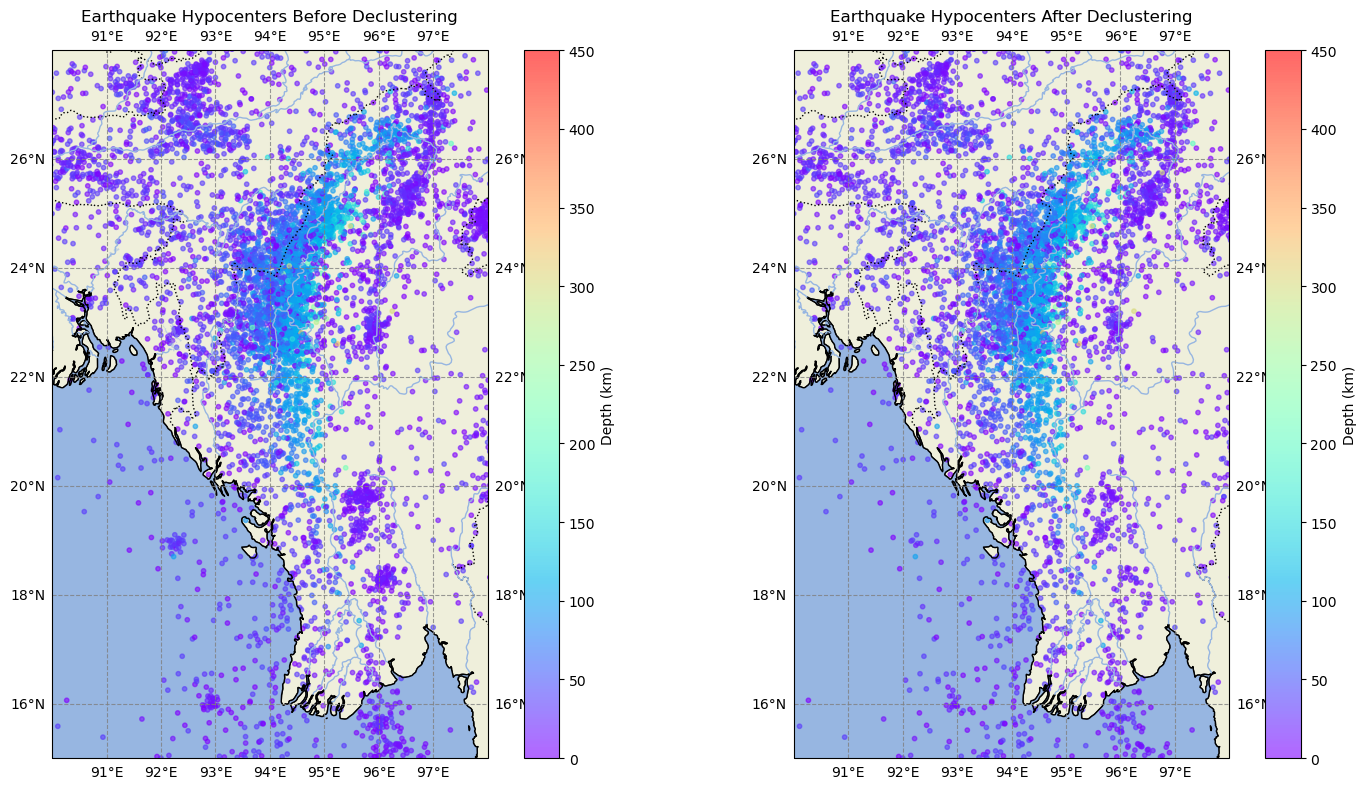

In [20]:
# Ensure uniform column names
uniform_columns = {
    'LAT': 'latitude',
    'LON': 'longitude',
    'DEPTH': 'depth',
    'MAG': 'magnitude',
    'DATE': 'date'
}
cleaned_data.rename(columns=uniform_columns, inplace=True)
declustered_data.rename(columns=uniform_columns, inplace=True)

# Define the Myanmar region bounding box (adjust as needed)
min_lat, max_lat = 15, 28
min_lon, max_lon = 90, 98

# Function to plot earthquakes on a map
def plot_earthquakes(data, title, ax):
    ax.set_extent([min_lon, max_lon, min_lat, max_lat])
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    # Add gridlines with labels
    ax.gridlines(draw_labels=True, color='gray', alpha=0.8, linestyle='--')
    ax.top_labels = False
    ax.right_labels = False
    ax.xlabel_style = {'size': 12, 'color': 'black', 'rotation': 90}
    ax.ylabel_style = {'size': 12, 'color': 'black'}

    scatter = ax.scatter(data['longitude'], data['latitude'], c=data['depth'], cmap='rainbow', s=10, alpha=0.6, transform=ccrs.PlateCarree())
    plt.colorbar(scatter, ax=ax, orientation='vertical', label='Depth (km)')
    ax.set_title(title)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot before declustering
plot_earthquakes(cleaned_data, 'Earthquake Hypocenters Before Declustering', ax1)

# Plot after declustering
plot_earthquakes(declustered_data, 'Earthquake Hypocenters After Declustering', ax2)

plt.tight_layout()
plt.show()

In [21]:
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta
# from math import radians, cos, sin, sqrt, atan2

# # Load the cleaned data
# file_path = '../data/Cleaned_ISC_Data.csv'
# cleaned_data = pd.read_csv(file_path)

# # Ensure uniform column names
# uniform_columns = {
#     'LAT': 'latitude',
#     'LON': 'longitude',
#     'DEPTH': 'depth',
#     'MAG': 'magnitude',
#     'DATE': 'date'
# }
# cleaned_data.rename(columns=uniform_columns, inplace=True)

# # Convert date to datetime
# cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%d-%m-%Y')

# # Haversine formula to calculate distance between two points on the Earth's surface
# def haversine(lon1, lat1, lon2, lat2):
#     R = 6371.0  # Radius of the Earth in kilometers
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))
#     distance = R * c
#     return distance

# # Function to apply Reasenberg declustering
# def reasenberg_declustering(data, k1=0.1238, k2=0.983, k3=0.032, k4=2.7389, k5=0.5409, k6=-0.547):
#     declustered_indices = []
#     n = len(data)
#     is_mainshock = [True] * n

#     for i in range(n):
#         if not is_mainshock[i]:
#             continue
        
#         for j in range(i + 1, n):
#             t_diff = (data.iloc[j]['date'] - data.iloc[i]['date']).days

#             if data.iloc[j]['magnitude'] >= 6.5:
#                 t_window = 10 ** (k3 * data.iloc[j]['magnitude'] + k4)
#             else:
#                 t_window = 10 ** (k5 * data.iloc[j]['magnitude'] + k6)

#             if t_diff > t_window:
#                 break

#             distance = haversine(data.iloc[i]['longitude'], data.iloc[i]['latitude'], data.iloc[j]['longitude'], data.iloc[j]['latitude'])
#             spatial_window = 10 ** (k1 * data.iloc[j]['magnitude'] + k2)

#             if distance <= spatial_window and t_diff <= t_window:
#                 if data.iloc[i]['magnitude'] >= data.iloc[j]['magnitude']:
#                     is_mainshock[j] = False
#                 else:
#                     is_mainshock[i] = False
#                     break

#     declustered_indices = [i for i in range(n) if is_mainshock[i]]
#     return data.iloc[declustered_indices]

# # Apply the Reasenberg declustering algorithm
# declustered_data = reasenberg_declustering(cleaned_data)
# print(len(declustered_data))
# # Save the declustered DataFrame to a new CSV file
# # output_file_path = 'path_to_your/Declustered_ISC_Data_Reasenberg.csv'
# # declustered_data.to_csv(output_file_path, index=False)

# # print(f"Declustered data saved to {output_file_path}")